In [1]:
from google.colab import drive
import sys
import os

# Montar Google Drive
drive.mount('/content/drive')

# Definir rutas base y repo
BASE_PATH = '/content/drive/MyDrive/Tesis'
REPO_NAME = 'Tesis_NN'
REPO_PATH = os.path.join(BASE_PATH, REPO_NAME)

# Agregar repo al path de Python para imports
if REPO_PATH not in sys.path:
    sys.path.append(REPO_PATH)

# Cambiar directorio actual al repo (para comandos git)
os.chdir(REPO_PATH)

print(f"Drive montado. Carpeta repo seteada en: {REPO_PATH}")

Mounted at /content/drive
Drive montado. Carpeta repo seteada en: /content/drive/MyDrive/Tesis/Tesis_NN


In [2]:
from google.colab import files
%cd /content/drive/MyDrive/Tesis/Tesis_NN
!pip install -r requirements.txt

/content
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.6 MB/s eta 0:00:00
ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement pywin32==310 (from versions: none)
ERROR: No matching distribution found for pywin32==310


In [3]:
!pip install webdataset

  Using cached braceexpand-0.1.7-py2.py3-none-any.whl.metadata (3.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 kB 5.3 MB/s eta 0:00:00


In [6]:
# ───────────────────────────────────────────────────────────────────────────────
# 📦 Standard Library Imports
# ───────────────────────────────────────────────────────────────────────────────
import os
import sys
import time
import csv
import json
from pathlib import Path

# ───────────────────────────────────────────────────────────────────────────────
# 📚 Scientific & Data Libraries
# ───────────────────────────────────────────────────────────────────────────────
import numpy as np
import matplotlib.pyplot as plt

# ───────────────────────────────────────────────────────────────────────────────
# 🌍 Third-Party Library Imports (PyTorch)
# ───────────────────────────────────────────────────────────────────────────────
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split

# ───────────────────────────────────────────────────────────────────────────────
# 🧩 Custom Project Modules
# ───────────────────────────────────────────────────────────────────────────────
# Add custom project folder to system path to enable local module imports
sys.path.append('C:/Users/nnobi/Desktop/FIUBA/Tesis/Project')

from project_package.utils import train_common_routines2 as tcr
from project_package.conv_net.ConvNet_model import SRCNN_small
from project_package.dataset_manager.tensor_images_dataset import Tensor_images_dataset

# ───────────────────────────────────────────────────────────────────────────────
# 🔧 Configuration
# ───────────────────────────────────────────────────────────────────────────────
model_selection = 'SRCNN_small'
epochs = 200
lr = 1e-5
batch_size = 32

# ───────────────────────────────────────────────────────────────────────────────
# 📁 Paths Setup
# ───────────────────────────────────────────────────────────────────────────────
script_dir = os.getcwd()
project_dir = os.path.abspath(os.path.join(script_dir, '..'))

dataset = 'dataset_test2' # Select Dataset
dataset_folder = os.path.join('/content', dataset)
file_path_low_res = os.path.join(dataset_folder,'10m.pt')
file_path_high_res = os.path.join(dataset_folder,'05m.pt')

# Add custom project folder to system path to enable local module imports
if os.name == "posix":
    file_path_low_res = file_path_low_res.replace("\\", "/")
    file_path_high_res = file_path_high_res.replace("\\", "/")


#Split porcentages for training, validation and testing
train_data_ratio=0.95
validation_data_ratio=0.04
test_data_ratio=0.01

# Results folder and files
results_folder = os.path.join(project_dir, 'results', model_selection)
os.makedirs(results_folder, exist_ok=True)

loss_png_file = os.path.join(results_folder, f"loss_lr={lr}_batch_size={batch_size}_model={model_selection}.png")
psnr_png_file = os.path.join(results_folder, f"psnr_lr={lr}_batch_size={batch_size}_model={model_selection}.png")
final_model_pth_file = os.path.join(results_folder, f"model_lr={lr}_batch_size={batch_size}_model={model_selection}.pth")
file_training_losses = os.path.join(results_folder, f"training_losses_lr={lr}_batch_size={batch_size}_model={model_selection}.csv")


Device: cuda
The model:
SRCNN_small(
  (conv1): Conv2d(3, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4), padding_mode=replicate)
  (relu1): ReLU(inplace=True)
  (conv2): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=replicate)
  (relu2): ReLU(inplace=True)
  (conv3): Conv2d(32, 3, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), padding_mode=replicate)
)
Total Parameters: 36,483
Trainable Parameters: 36,483
Model training to be done in only one GPU!
torch.Size([129, 3, 256, 256])
torch.Size([129, 3, 256, 256])
Number of training samples: 123
Number of validation samples: 5
Number of testing samples: 1
Training with unpatched images

Epoch 1 of 200


100%|██████████| 1/1 [00:00<00:00,  2.51it/s]


Train PSNR: 13.180
Val PSNR: 12.251
Checkpoint saved at epoch 0

Epoch 2 of 200


100%|██████████| 1/1 [00:00<00:00,  9.42it/s]

Train PSNR: 13.255
Val PSNR: 12.318

Epoch 3 of 200



100%|██████████| 1/1 [00:00<00:00, 10.10it/s]

Train PSNR: 13.313
Val PSNR: 12.388

Epoch 4 of 200



100%|██████████| 1/1 [00:00<00:00,  9.27it/s]

Train PSNR: 13.407
Val PSNR: 12.464

Epoch 5 of 200



100%|██████████| 1/1 [00:00<00:00,  6.23it/s]

Train PSNR: 13.509
Val PSNR: 12.545

Epoch 6 of 200



100%|██████████| 1/1 [00:00<00:00,  6.54it/s]

Train PSNR: 13.538
Val PSNR: 12.631
Checkpoint saved at epoch 5

Epoch 7 of 200



100%|██████████| 1/1 [00:00<00:00,  9.98it/s]

Train PSNR: 13.685
Val PSNR: 12.721

Epoch 8 of 200



100%|██████████| 1/1 [00:00<00:00,  9.54it/s]


Train PSNR: 13.691
Val PSNR: 12.815

Epoch 9 of 200


100%|██████████| 1/1 [00:00<00:00,  9.89it/s]

Train PSNR: 13.858
Val PSNR: 12.913

Epoch 10 of 200



100%|██████████| 1/1 [00:00<00:00,  9.45it/s]

Train PSNR: 13.916
Val PSNR: 13.014

Epoch 11 of 200



100%|██████████| 1/1 [00:00<00:00,  9.26it/s]


Train PSNR: 13.982
Val PSNR: 13.120
Checkpoint saved at epoch 10

Epoch 12 of 200


100%|██████████| 1/1 [00:00<00:00,  9.74it/s]

Train PSNR: 14.175
Val PSNR: 13.230

Epoch 13 of 200



100%|██████████| 1/1 [00:00<00:00,  8.12it/s]


Train PSNR: 14.211
Val PSNR: 13.346

Epoch 14 of 200


100%|██████████| 1/1 [00:00<00:00,  6.26it/s]

Train PSNR: 14.371
Val PSNR: 13.470

Epoch 15 of 200



100%|██████████| 1/1 [00:00<00:00,  5.95it/s]

Train PSNR: 14.482
Val PSNR: 13.600

Epoch 16 of 200



100%|██████████| 1/1 [00:00<00:00, 10.10it/s]


Train PSNR: 14.601
Val PSNR: 13.740
Checkpoint saved at epoch 15

Epoch 17 of 200


100%|██████████| 1/1 [00:00<00:00,  9.94it/s]

Train PSNR: 14.745
Val PSNR: 13.890

Epoch 18 of 200



100%|██████████| 1/1 [00:00<00:00, 10.08it/s]

Train PSNR: 14.894
Val PSNR: 14.050

Epoch 19 of 200



100%|██████████| 1/1 [00:00<00:00,  9.06it/s]

Train PSNR: 15.071
Val PSNR: 14.225

Epoch 20 of 200



100%|██████████| 1/1 [00:00<00:00,  8.91it/s]


Train PSNR: 15.244
Val PSNR: 14.413

Epoch 21 of 200


100%|██████████| 1/1 [00:00<00:00,  9.96it/s]


Train PSNR: 15.468
Val PSNR: 14.618
Checkpoint saved at epoch 20

Epoch 22 of 200


100%|██████████| 1/1 [00:00<00:00,  9.32it/s]

Train PSNR: 15.561
Val PSNR: 14.839

Epoch 23 of 200



100%|██████████| 1/1 [00:00<00:00,  5.41it/s]

Train PSNR: 15.803
Val PSNR: 15.080

Epoch 24 of 200



100%|██████████| 1/1 [00:00<00:00,  6.32it/s]

Train PSNR: 16.083
Val PSNR: 15.344

Epoch 25 of 200



100%|██████████| 1/1 [00:00<00:00,  9.62it/s]

Train PSNR: 16.278
Val PSNR: 15.627

Epoch 26 of 200



100%|██████████| 1/1 [00:00<00:00, 10.11it/s]


Train PSNR: 16.561
Val PSNR: 15.931
Checkpoint saved at epoch 25

Epoch 27 of 200


100%|██████████| 1/1 [00:00<00:00,  9.10it/s]

Train PSNR: 16.819
Val PSNR: 16.252

Epoch 28 of 200



100%|██████████| 1/1 [00:00<00:00,  9.65it/s]

Train PSNR: 17.014
Val PSNR: 16.590

Epoch 29 of 200



100%|██████████| 1/1 [00:00<00:00, 10.03it/s]

Train PSNR: 17.402
Val PSNR: 16.948

Epoch 30 of 200



100%|██████████| 1/1 [00:00<00:00,  9.56it/s]


Train PSNR: 17.685
Val PSNR: 17.315

Epoch 31 of 200


100%|██████████| 1/1 [00:00<00:00,  9.81it/s]


Train PSNR: 17.925
Val PSNR: 17.688
Checkpoint saved at epoch 30

Epoch 32 of 200


100%|██████████| 1/1 [00:00<00:00,  7.42it/s]

Train PSNR: 18.253
Val PSNR: 18.060

Epoch 33 of 200



100%|██████████| 1/1 [00:00<00:00,  6.30it/s]

Train PSNR: 18.628
Val PSNR: 18.428

Epoch 34 of 200



100%|██████████| 1/1 [00:00<00:00,  9.77it/s]

Train PSNR: 18.863
Val PSNR: 18.771

Epoch 35 of 200



100%|██████████| 1/1 [00:00<00:00,  8.94it/s]


Train PSNR: 19.159
Val PSNR: 19.087

Epoch 36 of 200


100%|██████████| 1/1 [00:00<00:00,  9.94it/s]


Train PSNR: 19.382
Val PSNR: 19.359
Checkpoint saved at epoch 35

Epoch 37 of 200


100%|██████████| 1/1 [00:00<00:00,  9.47it/s]

Train PSNR: 19.619
Val PSNR: 19.584

Epoch 38 of 200



100%|██████████| 1/1 [00:00<00:00,  9.74it/s]

Train PSNR: 19.832
Val PSNR: 19.754

Epoch 39 of 200



100%|██████████| 1/1 [00:00<00:00,  9.82it/s]


Train PSNR: 20.012
Val PSNR: 19.874

Epoch 40 of 200


100%|██████████| 1/1 [00:00<00:00, 10.04it/s]

Train PSNR: 20.070
Val PSNR: 19.948

Epoch 41 of 200



100%|██████████| 1/1 [00:00<00:00,  6.16it/s]

Train PSNR: 20.200
Val PSNR: 19.984
Checkpoint saved at epoch 40

Epoch 42 of 200



100%|██████████| 1/1 [00:00<00:00,  6.13it/s]

Train PSNR: 20.256
Val PSNR: 19.993

Epoch 43 of 200



100%|██████████| 1/1 [00:00<00:00,  9.68it/s]

Train PSNR: 20.331
Val PSNR: 19.976

Epoch 44 of 200



100%|██████████| 1/1 [00:00<00:00,  9.31it/s]


Train PSNR: 20.356
Val PSNR: 19.955

Epoch 45 of 200


100%|██████████| 1/1 [00:00<00:00,  8.48it/s]


Train PSNR: 20.382
Val PSNR: 19.937

Epoch 46 of 200


100%|██████████| 1/1 [00:00<00:00,  9.55it/s]


Train PSNR: 20.395
Val PSNR: 19.929
Checkpoint saved at epoch 45

Epoch 47 of 200


100%|██████████| 1/1 [00:00<00:00, 10.61it/s]

Train PSNR: 20.404
Val PSNR: 19.935

Epoch 48 of 200



100%|██████████| 1/1 [00:00<00:00,  9.89it/s]


Train PSNR: 20.451
Val PSNR: 19.949

Epoch 49 of 200


100%|██████████| 1/1 [00:00<00:00,  9.70it/s]

Train PSNR: 20.546
Val PSNR: 19.949

Epoch 50 of 200



100%|██████████| 1/1 [00:00<00:00,  6.05it/s]

Train PSNR: 20.584
Val PSNR: 19.966

Epoch 51 of 200



100%|██████████| 1/1 [00:00<00:00,  7.55it/s]

Train PSNR: 20.594
Val PSNR: 19.986
Checkpoint saved at epoch 50

Epoch 52 of 200



100%|██████████| 1/1 [00:00<00:00,  9.67it/s]

Train PSNR: 20.675
Val PSNR: 20.007

Epoch 53 of 200



100%|██████████| 1/1 [00:00<00:00,  8.83it/s]


Train PSNR: 20.643
Val PSNR: 20.030

Epoch 54 of 200


100%|██████████| 1/1 [00:00<00:00,  9.09it/s]

Train PSNR: 20.707
Val PSNR: 20.045

Epoch 55 of 200



100%|██████████| 1/1 [00:00<00:00,  9.71it/s]

Train PSNR: 20.711
Val PSNR: 20.061

Epoch 56 of 200



100%|██████████| 1/1 [00:00<00:00,  9.81it/s]

Train PSNR: 20.721
Val PSNR: 20.076
Checkpoint saved at epoch 55

Epoch 57 of 200



100%|██████████| 1/1 [00:00<00:00,  9.24it/s]

Train PSNR: 20.784
Val PSNR: 20.076

Epoch 58 of 200



100%|██████████| 1/1 [00:00<00:00,  9.64it/s]

Train PSNR: 20.802
Val PSNR: 20.089

Epoch 59 of 200



100%|██████████| 1/1 [00:00<00:00,  7.56it/s]

Train PSNR: 20.783
Val PSNR: 20.101

Epoch 60 of 200



100%|██████████| 1/1 [00:00<00:00,  6.08it/s]

Train PSNR: 20.824
Val PSNR: 20.107

Epoch 61 of 200



100%|██████████| 1/1 [00:00<00:00,  8.41it/s]

Train PSNR: 20.873
Val PSNR: 20.111
Checkpoint saved at epoch 60

Epoch 62 of 200



100%|██████████| 1/1 [00:00<00:00,  9.49it/s]


Train PSNR: 20.881
Val PSNR: 20.124

Epoch 63 of 200


100%|██████████| 1/1 [00:00<00:00,  9.39it/s]


Train PSNR: 20.896
Val PSNR: 20.134

Epoch 64 of 200


100%|██████████| 1/1 [00:00<00:00,  9.44it/s]

Train PSNR: 20.910
Val PSNR: 20.136

Epoch 65 of 200



100%|██████████| 1/1 [00:00<00:00,  9.36it/s]

Train PSNR: 20.907
Val PSNR: 20.141

Epoch 66 of 200



100%|██████████| 1/1 [00:00<00:00,  9.10it/s]


Train PSNR: 20.949
Val PSNR: 20.133
Checkpoint saved at epoch 65

Epoch 67 of 200


100%|██████████| 1/1 [00:00<00:00,  9.20it/s]

Train PSNR: 20.933
Val PSNR: 20.140

Epoch 68 of 200



100%|██████████| 1/1 [00:00<00:00,  7.05it/s]

Train PSNR: 20.946
Val PSNR: 20.160

Epoch 69 of 200



100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

Train PSNR: 20.976
Val PSNR: 20.170

Epoch 70 of 200



100%|██████████| 1/1 [00:00<00:00,  8.36it/s]

Train PSNR: 20.992
Val PSNR: 20.186

Epoch 71 of 200



100%|██████████| 1/1 [00:00<00:00,  9.42it/s]


Train PSNR: 21.021
Val PSNR: 20.194
Checkpoint saved at epoch 70

Epoch 72 of 200


100%|██████████| 1/1 [00:00<00:00,  9.67it/s]

Train PSNR: 21.071
Val PSNR: 20.198

Epoch 73 of 200



100%|██████████| 1/1 [00:00<00:00,  9.66it/s]

Train PSNR: 20.999
Val PSNR: 20.215

Epoch 74 of 200



100%|██████████| 1/1 [00:00<00:00,  8.95it/s]


Train PSNR: 21.064
Val PSNR: 20.227

Epoch 75 of 200


100%|██████████| 1/1 [00:00<00:00,  8.77it/s]

Train PSNR: 21.092
Val PSNR: 20.223

Epoch 76 of 200



100%|██████████| 1/1 [00:00<00:00,  9.63it/s]


Train PSNR: 21.109
Val PSNR: 20.224
Checkpoint saved at epoch 75

Epoch 77 of 200


100%|██████████| 1/1 [00:00<00:00,  6.42it/s]

Train PSNR: 21.149
Val PSNR: 20.238

Epoch 78 of 200



100%|██████████| 1/1 [00:00<00:00,  6.92it/s]

Train PSNR: 21.138
Val PSNR: 20.244

Epoch 79 of 200



100%|██████████| 1/1 [00:00<00:00,  9.55it/s]

Train PSNR: 21.214
Val PSNR: 20.260

Epoch 80 of 200



100%|██████████| 1/1 [00:00<00:00,  9.57it/s]

Train PSNR: 21.234
Val PSNR: 20.274

Epoch 81 of 200



100%|██████████| 1/1 [00:00<00:00,  7.94it/s]

Train PSNR: 21.236
Val PSNR: 20.282
Checkpoint saved at epoch 80

Epoch 82 of 200



100%|██████████| 1/1 [00:00<00:00,  9.00it/s]

Train PSNR: 21.265
Val PSNR: 20.283

Epoch 83 of 200



100%|██████████| 1/1 [00:00<00:00,  9.71it/s]

Train PSNR: 21.298
Val PSNR: 20.290

Epoch 84 of 200



100%|██████████| 1/1 [00:00<00:00,  9.21it/s]


Train PSNR: 21.309
Val PSNR: 20.300

Epoch 85 of 200


100%|██████████| 1/1 [00:00<00:00,  7.36it/s]

Train PSNR: 21.316
Val PSNR: 20.310

Epoch 86 of 200



100%|██████████| 1/1 [00:00<00:00,  6.38it/s]

Train PSNR: 21.358
Val PSNR: 20.307
Checkpoint saved at epoch 85

Epoch 87 of 200



100%|██████████| 1/1 [00:00<00:00,  8.59it/s]


Train PSNR: 21.363
Val PSNR: 20.307

Epoch 88 of 200


100%|██████████| 1/1 [00:00<00:00,  8.99it/s]


Train PSNR: 21.400
Val PSNR: 20.320

Epoch 89 of 200


100%|██████████| 1/1 [00:00<00:00,  9.34it/s]

Train PSNR: 21.381
Val PSNR: 20.324

Epoch 90 of 200



100%|██████████| 1/1 [00:00<00:00,  9.88it/s]


Train PSNR: 21.388
Val PSNR: 20.348

Epoch 91 of 200


100%|██████████| 1/1 [00:00<00:00,  9.07it/s]


Train PSNR: 21.374
Val PSNR: 20.359
Checkpoint saved at epoch 90

Epoch 92 of 200


100%|██████████| 1/1 [00:00<00:00,  9.48it/s]


Train PSNR: 21.496
Val PSNR: 20.351

Epoch 93 of 200


100%|██████████| 1/1 [00:00<00:00,  9.45it/s]


Train PSNR: 21.469
Val PSNR: 20.341

Epoch 94 of 200


100%|██████████| 1/1 [00:00<00:00,  5.83it/s]

Train PSNR: 21.468
Val PSNR: 20.339

Epoch 95 of 200



100%|██████████| 1/1 [00:00<00:00,  6.01it/s]

Train PSNR: 21.477
Val PSNR: 20.351

Epoch 96 of 200



100%|██████████| 1/1 [00:00<00:00,  7.83it/s]

Train PSNR: 21.503
Val PSNR: 20.352
Checkpoint saved at epoch 95

Epoch 97 of 200



100%|██████████| 1/1 [00:00<00:00,  9.87it/s]

Train PSNR: 21.538
Val PSNR: 20.365

Epoch 98 of 200



100%|██████████| 1/1 [00:00<00:00,  9.37it/s]


Train PSNR: 21.530
Val PSNR: 20.377

Epoch 99 of 200


100%|██████████| 1/1 [00:00<00:00,  9.64it/s]

Train PSNR: 21.558
Val PSNR: 20.386

Epoch 100 of 200



100%|██████████| 1/1 [00:00<00:00,  9.79it/s]


Train PSNR: 21.569
Val PSNR: 20.391

Epoch 101 of 200


100%|██████████| 1/1 [00:00<00:00,  9.01it/s]


Train PSNR: 21.583
Val PSNR: 20.399
Checkpoint saved at epoch 100

Epoch 102 of 200


100%|██████████| 1/1 [00:00<00:00,  9.38it/s]


Train PSNR: 21.624
Val PSNR: 20.403

Epoch 103 of 200


100%|██████████| 1/1 [00:00<00:00,  7.36it/s]

Train PSNR: 21.598
Val PSNR: 20.407

Epoch 104 of 200



100%|██████████| 1/1 [00:00<00:00,  7.52it/s]

Train PSNR: 21.585
Val PSNR: 20.398

Epoch 105 of 200



100%|██████████| 1/1 [00:00<00:00,  8.86it/s]


Train PSNR: 21.618
Val PSNR: 20.396

Epoch 106 of 200


100%|██████████| 1/1 [00:00<00:00,  9.53it/s]


Train PSNR: 21.659
Val PSNR: 20.397
Checkpoint saved at epoch 105

Epoch 107 of 200


100%|██████████| 1/1 [00:00<00:00,  9.19it/s]


Train PSNR: 21.634
Val PSNR: 20.402

Epoch 108 of 200


100%|██████████| 1/1 [00:00<00:00, 10.06it/s]

Train PSNR: 21.670
Val PSNR: 20.418

Epoch 109 of 200



100%|██████████| 1/1 [00:00<00:00,  9.97it/s]

Train PSNR: 21.698
Val PSNR: 20.421

Epoch 110 of 200



100%|██████████| 1/1 [00:00<00:00,  9.06it/s]

Train PSNR: 21.714
Val PSNR: 20.429

Epoch 111 of 200



100%|██████████| 1/1 [00:00<00:00,  8.96it/s]


Train PSNR: 21.750
Val PSNR: 20.432
Checkpoint saved at epoch 110

Epoch 112 of 200


100%|██████████| 1/1 [00:00<00:00,  7.69it/s]

Train PSNR: 21.746
Val PSNR: 20.434

Epoch 113 of 200



100%|██████████| 1/1 [00:00<00:00,  6.36it/s]

Train PSNR: 21.779
Val PSNR: 20.440

Epoch 114 of 200



100%|██████████| 1/1 [00:00<00:00,  8.64it/s]

Train PSNR: 21.736
Val PSNR: 20.443

Epoch 115 of 200



100%|██████████| 1/1 [00:00<00:00,  9.06it/s]


Train PSNR: 21.800
Val PSNR: 20.442

Epoch 116 of 200


100%|██████████| 1/1 [00:00<00:00,  8.97it/s]


Train PSNR: 21.744
Val PSNR: 20.443
Checkpoint saved at epoch 115

Epoch 117 of 200


100%|██████████| 1/1 [00:00<00:00,  8.31it/s]

Train PSNR: 21.751
Val PSNR: 20.446

Epoch 118 of 200



100%|██████████| 1/1 [00:00<00:00,  8.63it/s]


Train PSNR: 21.825
Val PSNR: 20.441

Epoch 119 of 200


100%|██████████| 1/1 [00:00<00:00,  9.34it/s]


Train PSNR: 21.780
Val PSNR: 20.439

Epoch 120 of 200


100%|██████████| 1/1 [00:00<00:00,  7.29it/s]

Train PSNR: 21.842
Val PSNR: 20.440

Epoch 121 of 200



100%|██████████| 1/1 [00:00<00:00,  5.93it/s]

Train PSNR: 21.806
Val PSNR: 20.445
Checkpoint saved at epoch 120

Epoch 122 of 200



100%|██████████| 1/1 [00:00<00:00,  9.45it/s]


Train PSNR: 21.870
Val PSNR: 20.450

Epoch 123 of 200


100%|██████████| 1/1 [00:00<00:00,  9.03it/s]

Train PSNR: 21.818
Val PSNR: 20.457

Epoch 124 of 200



100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

Train PSNR: 21.854
Val PSNR: 20.452

Epoch 125 of 200



100%|██████████| 1/1 [00:00<00:00,  9.03it/s]


Train PSNR: 21.892
Val PSNR: 20.461

Epoch 126 of 200


100%|██████████| 1/1 [00:00<00:00,  9.61it/s]


Train PSNR: 21.868
Val PSNR: 20.465
Checkpoint saved at epoch 125

Epoch 127 of 200


100%|██████████| 1/1 [00:00<00:00,  9.30it/s]


Train PSNR: 21.882
Val PSNR: 20.461

Epoch 128 of 200


100%|██████████| 1/1 [00:00<00:00,  8.91it/s]


Train PSNR: 21.927
Val PSNR: 20.456

Epoch 129 of 200


100%|██████████| 1/1 [00:00<00:00,  5.78it/s]

Train PSNR: 21.869
Val PSNR: 20.462

Epoch 130 of 200



100%|██████████| 1/1 [00:00<00:00,  6.53it/s]

Train PSNR: 21.884
Val PSNR: 20.460

Epoch 131 of 200



100%|██████████| 1/1 [00:00<00:00,  8.94it/s]

Train PSNR: 21.915
Val PSNR: 20.462
Checkpoint saved at epoch 130

Epoch 132 of 200



100%|██████████| 1/1 [00:00<00:00,  9.32it/s]

Train PSNR: 21.919
Val PSNR: 20.477

Epoch 133 of 200



100%|██████████| 1/1 [00:00<00:00,  9.33it/s]


Train PSNR: 21.885
Val PSNR: 20.491

Epoch 134 of 200


100%|██████████| 1/1 [00:00<00:00,  8.62it/s]

Train PSNR: 21.948
Val PSNR: 20.496

Epoch 135 of 200



100%|██████████| 1/1 [00:00<00:00, 10.31it/s]


Train PSNR: 21.958
Val PSNR: 20.489

Epoch 136 of 200


100%|██████████| 1/1 [00:00<00:00,  9.45it/s]


Train PSNR: 21.924
Val PSNR: 20.490
Checkpoint saved at epoch 135

Epoch 137 of 200


100%|██████████| 1/1 [00:00<00:00,  7.00it/s]

Train PSNR: 21.986
Val PSNR: 20.492

Epoch 138 of 200



100%|██████████| 1/1 [00:00<00:00,  7.01it/s]

Train PSNR: 21.985
Val PSNR: 20.494

Epoch 139 of 200



100%|██████████| 1/1 [00:00<00:00,  9.83it/s]

Train PSNR: 21.959
Val PSNR: 20.496

Epoch 140 of 200



100%|██████████| 1/1 [00:00<00:00,  9.55it/s]

Train PSNR: 21.970
Val PSNR: 20.496

Epoch 141 of 200



100%|██████████| 1/1 [00:00<00:00,  7.90it/s]

Train PSNR: 22.042
Val PSNR: 20.504
Checkpoint saved at epoch 140

Epoch 142 of 200



100%|██████████| 1/1 [00:00<00:00,  9.81it/s]


Train PSNR: 21.980
Val PSNR: 20.505

Epoch 143 of 200


100%|██████████| 1/1 [00:00<00:00,  9.18it/s]


Train PSNR: 22.023
Val PSNR: 20.510

Epoch 144 of 200


100%|██████████| 1/1 [00:00<00:00,  9.35it/s]


Train PSNR: 22.026
Val PSNR: 20.523

Epoch 145 of 200


100%|██████████| 1/1 [00:00<00:00,  9.23it/s]


Train PSNR: 21.979
Val PSNR: 20.523

Epoch 146 of 200


100%|██████████| 1/1 [00:00<00:00,  5.70it/s]


Train PSNR: 22.021
Val PSNR: 20.523
Checkpoint saved at epoch 145

Epoch 147 of 200


100%|██████████| 1/1 [00:00<00:00,  5.64it/s]

Train PSNR: 22.057
Val PSNR: 20.529

Epoch 148 of 200



100%|██████████| 1/1 [00:00<00:00,  9.51it/s]

Train PSNR: 22.051
Val PSNR: 20.528

Epoch 149 of 200



100%|██████████| 1/1 [00:00<00:00,  9.56it/s]

Train PSNR: 21.988
Val PSNR: 20.531

Epoch 150 of 200



100%|██████████| 1/1 [00:00<00:00,  9.76it/s]


Train PSNR: 22.075
Val PSNR: 20.537

Epoch 151 of 200


100%|██████████| 1/1 [00:00<00:00,  9.51it/s]


Train PSNR: 22.034
Val PSNR: 20.546
Checkpoint saved at epoch 150

Epoch 152 of 200


100%|██████████| 1/1 [00:00<00:00, 10.06it/s]


Train PSNR: 22.029
Val PSNR: 20.554

Epoch 153 of 200


100%|██████████| 1/1 [00:00<00:00,  8.80it/s]

Train PSNR: 22.007
Val PSNR: 20.554

Epoch 154 of 200



100%|██████████| 1/1 [00:00<00:00,  9.27it/s]


Train PSNR: 22.056
Val PSNR: 20.557

Epoch 155 of 200


100%|██████████| 1/1 [00:00<00:00,  6.39it/s]

Train PSNR: 22.078
Val PSNR: 20.561

Epoch 156 of 200



100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


Train PSNR: 22.099
Val PSNR: 20.571
Checkpoint saved at epoch 155

Epoch 157 of 200


100%|██████████| 1/1 [00:00<00:00,  9.13it/s]


Train PSNR: 22.109
Val PSNR: 20.579

Epoch 158 of 200


100%|██████████| 1/1 [00:00<00:00,  8.94it/s]

Train PSNR: 22.093
Val PSNR: 20.589

Epoch 159 of 200



100%|██████████| 1/1 [00:00<00:00,  8.99it/s]


Train PSNR: 22.140
Val PSNR: 20.594

Epoch 160 of 200


100%|██████████| 1/1 [00:00<00:00,  9.22it/s]

Train PSNR: 22.128
Val PSNR: 20.600

Epoch 161 of 200



100%|██████████| 1/1 [00:00<00:00,  9.88it/s]


Train PSNR: 22.141
Val PSNR: 20.602
Checkpoint saved at epoch 160

Epoch 162 of 200


100%|██████████| 1/1 [00:00<00:00,  8.74it/s]


Train PSNR: 22.128
Val PSNR: 20.609

Epoch 163 of 200


100%|██████████| 1/1 [00:00<00:00,  9.42it/s]

Train PSNR: 22.121
Val PSNR: 20.624

Epoch 164 of 200



100%|██████████| 1/1 [00:00<00:00,  6.37it/s]

Train PSNR: 22.139
Val PSNR: 20.632

Epoch 165 of 200



100%|██████████| 1/1 [00:00<00:00,  8.59it/s]

Train PSNR: 22.138
Val PSNR: 20.629

Epoch 166 of 200



100%|██████████| 1/1 [00:00<00:00,  9.32it/s]


Train PSNR: 22.104
Val PSNR: 20.640
Checkpoint saved at epoch 165

Epoch 167 of 200


100%|██████████| 1/1 [00:00<00:00,  9.69it/s]


Train PSNR: 22.135
Val PSNR: 20.642

Epoch 168 of 200


100%|██████████| 1/1 [00:00<00:00,  9.31it/s]

Train PSNR: 22.148
Val PSNR: 20.652

Epoch 169 of 200



100%|██████████| 1/1 [00:00<00:00,  9.08it/s]


Train PSNR: 22.174
Val PSNR: 20.667

Epoch 170 of 200


100%|██████████| 1/1 [00:00<00:00, 10.48it/s]

Train PSNR: 22.204
Val PSNR: 20.666

Epoch 171 of 200



100%|██████████| 1/1 [00:00<00:00,  7.98it/s]

Train PSNR: 22.215
Val PSNR: 20.668
Checkpoint saved at epoch 170

Epoch 172 of 200



100%|██████████| 1/1 [00:00<00:00,  5.65it/s]

Train PSNR: 22.236
Val PSNR: 20.671

Epoch 173 of 200



100%|██████████| 1/1 [00:00<00:00,  6.10it/s]

Train PSNR: 22.128
Val PSNR: 20.681

Epoch 174 of 200



100%|██████████| 1/1 [00:00<00:00,  9.53it/s]

Train PSNR: 22.236
Val PSNR: 20.684

Epoch 175 of 200



100%|██████████| 1/1 [00:00<00:00,  9.21it/s]


Train PSNR: 22.229
Val PSNR: 20.691

Epoch 176 of 200


100%|██████████| 1/1 [00:00<00:00,  9.57it/s]


Train PSNR: 22.241
Val PSNR: 20.690
Checkpoint saved at epoch 175

Epoch 177 of 200


100%|██████████| 1/1 [00:00<00:00,  9.09it/s]


Train PSNR: 22.213
Val PSNR: 20.697

Epoch 178 of 200


100%|██████████| 1/1 [00:00<00:00,  9.56it/s]


Train PSNR: 22.199
Val PSNR: 20.715

Epoch 179 of 200


100%|██████████| 1/1 [00:00<00:00,  8.15it/s]

Train PSNR: 22.185
Val PSNR: 20.734

Epoch 180 of 200



100%|██████████| 1/1 [00:00<00:00,  9.49it/s]

Train PSNR: 22.192
Val PSNR: 20.750

Epoch 181 of 200



100%|██████████| 1/1 [00:00<00:00,  6.42it/s]

Train PSNR: 22.248
Val PSNR: 20.766
Checkpoint saved at epoch 180

Epoch 182 of 200



100%|██████████| 1/1 [00:00<00:00,  8.31it/s]

Train PSNR: 22.301
Val PSNR: 20.775

Epoch 183 of 200



100%|██████████| 1/1 [00:00<00:00,  8.69it/s]

Train PSNR: 22.336
Val PSNR: 20.792

Epoch 184 of 200



100%|██████████| 1/1 [00:00<00:00,  9.00it/s]


Train PSNR: 22.251
Val PSNR: 20.803

Epoch 185 of 200


100%|██████████| 1/1 [00:00<00:00,  8.93it/s]

Train PSNR: 22.265
Val PSNR: 20.815

Epoch 186 of 200



100%|██████████| 1/1 [00:00<00:00,  9.06it/s]


Train PSNR: 22.342
Val PSNR: 20.823
Checkpoint saved at epoch 185

Epoch 187 of 200


100%|██████████| 1/1 [00:00<00:00,  9.48it/s]


Train PSNR: 22.270
Val PSNR: 20.832

Epoch 188 of 200


100%|██████████| 1/1 [00:00<00:00, 10.05it/s]


Train PSNR: 22.285
Val PSNR: 20.849

Epoch 189 of 200


100%|██████████| 1/1 [00:00<00:00,  7.58it/s]

Train PSNR: 22.300
Val PSNR: 20.868

Epoch 190 of 200



100%|██████████| 1/1 [00:00<00:00,  7.28it/s]

Train PSNR: 22.370
Val PSNR: 20.878

Epoch 191 of 200



100%|██████████| 1/1 [00:00<00:00,  6.67it/s]

Train PSNR: 22.375
Val PSNR: 20.886
Checkpoint saved at epoch 190

Epoch 192 of 200



100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

Train PSNR: 22.386
Val PSNR: 20.894

Epoch 193 of 200



100%|██████████| 1/1 [00:00<00:00,  8.50it/s]

Train PSNR: 22.359
Val PSNR: 20.905

Epoch 194 of 200



100%|██████████| 1/1 [00:00<00:00,  8.95it/s]


Train PSNR: 22.392
Val PSNR: 20.916

Epoch 195 of 200


100%|██████████| 1/1 [00:00<00:00,  9.71it/s]


Train PSNR: 22.451
Val PSNR: 20.924

Epoch 196 of 200


100%|██████████| 1/1 [00:00<00:00,  8.64it/s]

Train PSNR: 22.378
Val PSNR: 20.930
Checkpoint saved at epoch 195

Epoch 197 of 200



100%|██████████| 1/1 [00:00<00:00,  9.89it/s]


Train PSNR: 22.416
Val PSNR: 20.939

Epoch 198 of 200


100%|██████████| 1/1 [00:00<00:00,  6.40it/s]

Train PSNR: 22.386
Val PSNR: 20.955

Epoch 199 of 200



100%|██████████| 1/1 [00:00<00:00,  7.41it/s]

Train PSNR: 22.449
Val PSNR: 20.959

Epoch 200 of 200



100%|██████████| 1/1 [00:00<00:00,  9.55it/s]


Train PSNR: 22.394
Val PSNR: 20.968

✅ Finished training in: 5.37 minutes


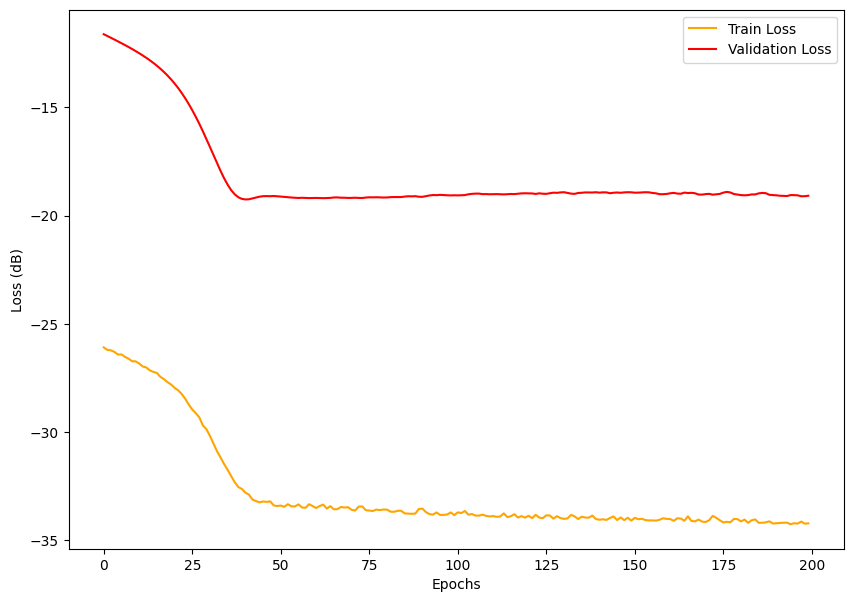

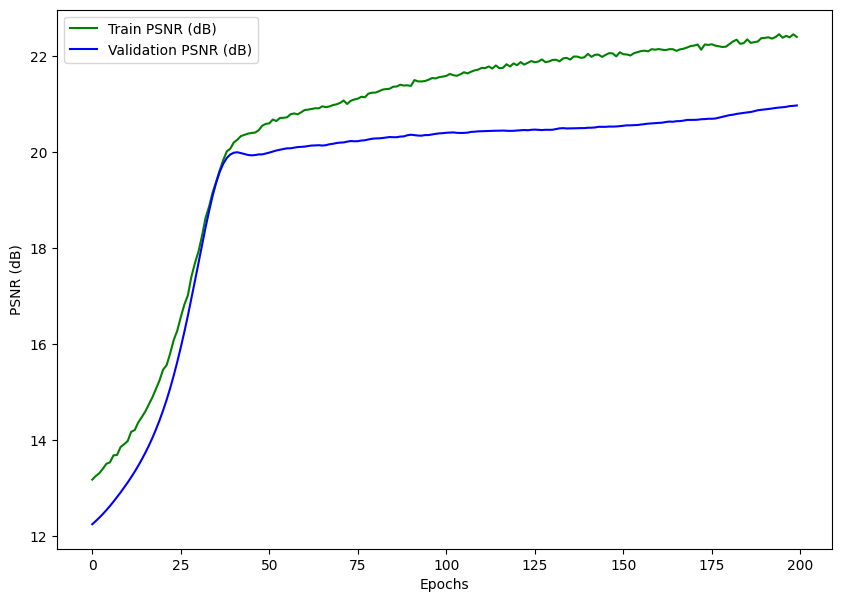


💾 Saving model...


In [9]:
# ───────────────────────────────────────────────────────────────────────────────
# 🚀 Training Pipeline
# ───────────────────────────────────────────────────────────────────────────────
if __name__ == "__main__":

    # 🧠 Model Initialization
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("Device:", device)

    torch.backends.cudnn.benchmark = True # Enables cuDNN auto-tuner to find the best algorithm for fixed input sizes (improves performance)

    model = SRCNN_small().to(device)
    print("The model:")
    print(model)

    model.count_parameters()
    print(f"Total Parameters: {model.total_params:,}")
    print(f"Trainable Parameters: {model.trainable_params:,}")

    model = tcr.multi_GPU_training(model)
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # 📊 Dataset and DataLoaders
    # Tune num_workers for dataloaders and buffersize

    dataset = Tensor_images_dataset(file_path_low_res,file_path_high_res)

    #Split data
    train_data, val_data, test_data = tcr.data_split(dataset,train_data_ratio, validation_data_ratio, test_data_ratio)

    # Create DataLoader (ensures batch-wise loading)

    dataloader_train = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
    dataloader_val = DataLoader(val_data, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
    dataloader_test = DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
    print("Training with unpatched images")


    # 🏋️ Training Loop
    train_loss, val_loss = [], []
    train_psnr, val_psnr = [], []

    start = time.time()
    for epoch in range(epochs):
        print(f"\nEpoch {epoch + 1} of {epochs}")

        train_epoch_loss, train_epoch_psnr = tcr.train(model, dataloader_train, optimizer, tcr.compute_loss_MSE, device)
        val_epoch_loss, val_epoch_psnr = tcr.validate(model, dataloader_val, epoch, tcr.compute_loss_MSE, device)

        print(f"Train PSNR: {train_epoch_psnr:.3f}")
        print(f"Val PSNR: {val_epoch_psnr:.3f}")

        train_loss.append(train_epoch_loss)
        train_psnr.append(train_epoch_psnr)
        val_loss.append(val_epoch_loss)
        val_psnr.append(val_epoch_psnr)

        if epoch % 5 == 0:
            checkpoint_path = os.path.join(results_folder, f"checkpoint_epoch_{epoch}_lr={lr}_batch_size={batch_size}_model={model_selection}.pth")
            tcr.save_checkpoint(epoch, model, optimizer, train_loss, filename=checkpoint_path)

        with open(file_training_losses, mode="a", newline="") as file:
            writer = csv.writer(file)
            writer.writerow([train_epoch_loss, train_epoch_psnr, val_epoch_loss, val_epoch_psnr])

    end = time.time()
    print(f"\n✅ Finished training in: {(end - start) / 60:.2f} minutes")

    # 📈 Loss Plot
    plt.figure(figsize=(10, 7))
    plt.plot(10 * np.log10(train_loss), color='orange', label='Train Loss')
    plt.plot(10 * np.log10(val_loss), color='red', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss (dB)')
    plt.legend()
    if os.path.exists(loss_png_file):
        os.remove(loss_png_file)
    plt.savefig(loss_png_file)
    plt.show()

    # 📈 PSNR Plot
    plt.figure(figsize=(10, 7))
    plt.plot(train_psnr, color='green', label='Train PSNR (dB)')
    plt.plot(val_psnr, color='blue', label='Validation PSNR (dB)')
    plt.xlabel('Epochs')
    plt.ylabel('PSNR (dB)')
    plt.legend()
    if os.path.exists(psnr_png_file):
        os.remove(psnr_png_file)
    plt.savefig(psnr_png_file)
    plt.show()

    # 💾 Save Final Model
    print('\n💾 Saving model...')
    if os.path.exists(final_model_pth_file):
        os.remove(final_model_pth_file)
    model = model.module if hasattr(model, "module") else model
    torch.save(model.state_dict(), final_model_pth_file)
